In [13]:
from ROOT import TFile
from root_numpy import tree2array
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics, preprocessing
from plot_confusion_matrix import plot_confusion_matrix
import copy
from sklearn.externals import joblib

In [2]:
fileSig = TFile("VLQFiles/out_VLQ_1400.root", "READ")
fileTT = TFile("VLQFiles/out_SMttbar.root", "READ")
fileQCD1 = TFile("VLQFiles/out_QCD1.root", "READ")
fileQCD2 = TFile("VLQFiles/out_QCD2.root", "READ")
fileQCD3 = TFile("VLQFiles/out_QCD3.root", "READ")
fileQCD4 = TFile("VLQFiles/out_QCD4.root", "READ")
fileQCD5 = TFile("VLQFiles/out_QCD5.root", "READ")
fileQCD6 = TFile("VLQFiles/out_QCD6.root", "READ")
fileQCD7 = TFile("VLQFiles/out_QCD7.root", "READ")
fileQCD8 = TFile("VLQFiles/out_QCD8.root", "READ")
fileQCD9 = TFile("VLQFiles/out_QCD9.root", "READ")
fileQCDall = TFile("VLQFiles/out_QCDall.root", "READ")
treeSig = fileSig.Get("eventTree")
treeTT = fileTT.Get("eventTree")
treeQCD1 = fileQCD1.Get("eventTree")
treeQCD2 = fileQCD2.Get("eventTree")
treeQCD3 = fileQCD3.Get("eventTree")
treeQCD4 = fileQCD4.Get("eventTree")
treeQCD5 = fileQCD5.Get("eventTree")
treeQCD6 = fileQCD6.Get("eventTree")
treeQCD7 = fileQCD7.Get("eventTree")
treeQCD8 = fileQCD8.Get("eventTree")
treeQCD9 = fileQCD9.Get("eventTree")
treeQCDall = fileQCDall.Get("eventTree")


In [43]:
sel = "mT1 > -5. && mT2 > -5. && ht > 2000"
numEvents = -1

treeVars = ['ht','numTop', 'numW', 'numZ', 'numH', 'numQCD', 'mT1', 'mT2']
arraySig = tree2array(treeSig, treeVars, sel, stop=numEvents)
arrayTT = tree2array(treeTT, treeVars, sel, stop=numEvents)
arrayQCD1 = tree2array(treeQCD1, treeVars, sel, stop=numEvents)
arrayQCD2 = tree2array(treeQCD2, treeVars, sel, stop=numEvents)
arrayQCD3 = tree2array(treeQCD3, treeVars, sel, stop=numEvents)
arrayQCD4 = tree2array(treeQCD4, treeVars, sel, stop=numEvents)
arrayQCD5 = tree2array(treeQCD5, treeVars, sel, stop=numEvents)
arrayQCD6 = tree2array(treeQCD6, treeVars, sel, stop=numEvents)
arrayQCD7 = tree2array(treeQCD7, treeVars, sel, stop=numEvents)
arrayQCD8 = tree2array(treeQCD8, treeVars, sel, stop=numEvents)
arrayQCD9 = tree2array(treeQCD9, treeVars, sel, stop=numEvents)
arrayQCDall = tree2array(treeQCDall, treeVars, sel, stop=numEvents)




In [44]:
newArraySig = []
newArrayTT = []
newArrayQCD1 = []
newArrayQCD2 = []
newArrayQCD3 = []
newArrayQCD4 = []
newArrayQCD5 = []
newArrayQCD6 = []
newArrayQCD7 = []
newArrayQCD8 = []
newArrayQCD9 = []
newArrayQCDall = []
for entry in arraySig[:]:
    a = list(entry)
    newArraySig.append(a)
for entry in arrayTT[:]:
    a = list(entry)
    newArrayTT.append(a)
for entry in arrayQCD1[:]:
    a = list(entry)
    newArrayQCD1.append(a)
for entry in arrayQCD2[:]:
    a = list(entry)
    newArrayQCD2.append(a)
for entry in arrayQCD3[:]:
    a = list(entry)
    newArrayQCD3.append(a)
for entry in arrayQCD4[:]:
    a = list(entry)
    newArrayQCD4.append(a)
for entry in arrayQCD5[:]:
    a = list(entry)
    newArrayQCD5.append(a)
for entry in arrayQCD6[:]:
    a = list(entry)
    newArrayQCD6.append(a)
for entry in arrayQCD7[:]:
    a = list(entry)
    newArrayQCD7.append(a)
for entry in arrayQCD8[:]:
    a = list(entry)
    newArrayQCD8.append(a)
for entry in arrayQCD9[:]:
    a = list(entry)
    newArrayQCD9.append(a)
for entry in arrayQCDall[:]:
    a = list(entry)
    newArrayQCDall.append(a)
arraySig = copy.copy(newArraySig)
arrayTT = copy.copy(newArrayTT)
arrayQCD1 = copy.copy(newArrayQCD1)
arrayQCD2 = copy.copy(newArrayQCD2)
arrayQCD3 = copy.copy(newArrayQCD3)
arrayQCD4 = copy.copy(newArrayQCD4)
arrayQCD5 = copy.copy(newArrayQCD5)
arrayQCD6 = copy.copy(newArrayQCD6)
arrayQCD7 = copy.copy(newArrayQCD7)
arrayQCD8 = copy.copy(newArrayQCD8)
arrayQCD9 = copy.copy(newArrayQCD9)
arrayQCDall = copy.copy(newArrayQCDall)

In [5]:
#randomize dataset
import random

trainData = []
targetData = []
nEvents = len(newArrayQCDall) + len(newArrayTT) + len(newArraySig)
print len(newArrayQCDall), len(newArrayTT), len(newArraySig)
nEvents = 500000
while nEvents > 0:
    rng_1 = random.randint(0,2)
    if (rng_1 == 0 and len(newArrayQCDall) > 0):
        print 'QCD'
        trainData.append(newArrayQCDall.pop())
        targetData.append(0)
        nEvents = nEvents - 1
    if (rng_1 == 1 and len(newArrayTT) > 0):
        print 'ttbar'
        trainData.append(newArrayTT.pop())
        targetData.append(0)
        nEvents = nEvents - 1
    if (rng_1 == 2 and len(newArraySig) > 0):
        print 'signal'
        trainData.append(newArraySig.pop())
        targetData.append(1)
        nEvents = nEvents - 1

4673441 19991 465883
signal
ttbar
ttbar
ttbar
signal
QCD
ttbar
signal
signal
ttbar
signal
signal
ttbar
signal
signal
ttbar
QCD
ttbar
ttbar
ttbar
ttbar
QCD
QCD
signal
QCD
ttbar
QCD
signal
ttbar
QCD
QCD
ttbar
ttbar
ttbar
ttbar
QCD
QCD
ttbar
ttbar
ttbar
ttbar
QCD
signal
signal
QCD
QCD
ttbar
signal
QCD
ttbar
ttbar
ttbar
ttbar
ttbar
ttbar
ttbar
ttbar
QCD
signal
ttbar
signal
ttbar
ttbar
QCD
signal
signal
QCD
QCD
ttbar
ttbar
QCD
QCD
signal
ttbar
ttbar
ttbar
ttbar
ttbar
ttbar
signal
ttbar
ttbar
signal
ttbar
QCD
QCD
signal
QCD
QCD
ttbar
QCD
QCD
signal
ttbar
QCD
signal
ttbar
signal
signal
ttbar
QCD
ttbar
signal
ttbar
signal
ttbar
ttbar
signal
signal
QCD
ttbar
ttbar
QCD
signal
ttbar
signal
ttbar
signal
QCD
signal
QCD
ttbar
ttbar
ttbar
signal
QCD
QCD
QCD
signal
ttbar
ttbar
QCD
QCD
signal
signal
QCD
QCD
ttbar
QCD
QCD
QCD
signal
QCD
ttbar
ttbar
QCD
QCD
ttbar
ttbar
signal
QCD
ttbar
signal
signal
QCD
QCD
ttbar
QCD
signal
ttbar
ttbar
signal
ttbar
ttbar
ttbar
ttbar
QCD
ttbar
ttbar
signal
QCD
ttbar
signa

In [7]:
len(targetData)

500000

In [23]:
#standardize dataset
scaler = preprocessing.StandardScaler().fit(trainData)
scaler = joblib.load('vlq_1400_scaler.pkl')
trainData = scaler.transform(trainData)
#arrayQCD1 = scaler.transform(arrayQCD1)
#arrayQCD2 = scaler.transform(arrayQCD2)
arrayQCD3 = scaler.transform(arrayQCD3)
arrayQCD4 = scaler.transform(arrayQCD4)
arrayQCD5 = scaler.transform(arrayQCD5)
arrayQCD6 = scaler.transform(arrayQCD6)
arrayQCD7 = scaler.transform(arrayQCD7)
arrayQCD8 = scaler.transform(arrayQCD8)
#arrayQCD9 = scaler.transform(arrayQCD9)
#arrayQCDall = scaler.transform(arrayQCDall)
#arrayTT = scaler.transform(arrayTT)
#arraySig = scaler.transform(arraySig)
#joblib.dump(scaler, 'vlq_1400_scaler.pkl')



In [15]:
from sklearn import neural_network
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.externals import joblib
numTrain = 250000
mlp = neural_network.MLPClassifier(hidden_layer_sizes=(20,20), verbose=True, activation='relu')
mlp.fit(trainData[:numTrain], targetData[:numTrain])
#mlp = joblib.load('vlq_1400.pkl')
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

Iteration 1, loss = 0.22829789
Iteration 2, loss = 0.18083719
Iteration 3, loss = 0.17243967
Iteration 4, loss = 0.16786487
Iteration 5, loss = 0.16448164
Iteration 6, loss = 0.16155727
Iteration 7, loss = 0.15908419
Iteration 8, loss = 0.15637054
Iteration 9, loss = 0.15393682
Iteration 10, loss = 0.15155495
Iteration 11, loss = 0.14961626
Iteration 12, loss = 0.14777703
Iteration 13, loss = 0.14610024
Iteration 14, loss = 0.14474457
Iteration 15, loss = 0.14347215
Iteration 16, loss = 0.14232219
Iteration 17, loss = 0.14155060
Iteration 18, loss = 0.14032451
Iteration 19, loss = 0.13977165
Iteration 20, loss = 0.13909353
Iteration 21, loss = 0.13830181
Iteration 22, loss = 0.13778310
Iteration 23, loss = 0.13717591
Iteration 24, loss = 0.13654866
Iteration 25, loss = 0.13601286
Iteration 26, loss = 0.13551126
Iteration 27, loss = 0.13472172
Iteration 28, loss = 0.13427633
Iteration 29, loss = 0.13381646
Iteration 30, loss = 0.13317719
Iteration 31, loss = 0.13268567
Iteration 32, los

In [16]:
mlp.score(trainData[numTrain:], targetData[numTrain:])

0.98074799999999995

In [17]:
from sklearn.externals import joblib
joblib.dump(mlp, 'vlq_1400.pkl') 

['vlq_1400.pkl']

In [18]:
len(arraySig)

465883

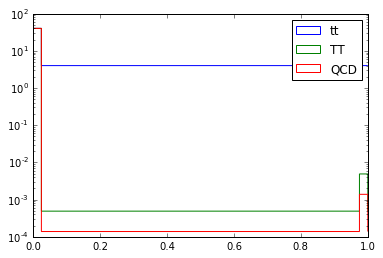

In [48]:
probsTT = mlp.predict_proba(arrayTT)
#probsQCD1 = mlp.predict_proba(arrayQCD1)
#probsQCD2 = mlp.predict_proba(arrayQCD2)
probsQCD3 = mlp.predict_proba(arrayQCD3)
probsQCD4 = mlp.predict_proba(arrayQCD4)
probsQCD5 = mlp.predict_proba(arrayQCD5)
probsQCD6 = mlp.predict_proba(arrayQCD6)
probsQCD7 = mlp.predict_proba(arrayQCD7)
probsQCD8 = mlp.predict_proba(arrayQCD8)
probsQCD9 = mlp.predict_proba(arrayQCD9)
probsSig = mlp.predict_proba(arraySig)
plt.figure()
plt.hist(probsTT.T[1], bins=40, range=(0,1), label='tt', histtype='step', normed=True, log=True)
plt.hist(probsSig.T[1], bins=40, range=(0,1), label='TT', histtype='step',normed=True, log=True)
plt.hist(probsQCD9.T[1], bins=40, range=(0,1), label='QCD', histtype='step', normed=True, log=True)
plt.legend()
plt.show()


In [25]:
lumi = 36000. #\pb
weight_qcd1 = 7823.0 * lumi / 5970600.
weight_qcd2 =  648.2 * lumi / 3928870.
weight_qcd3 = 186.9 * lumi / 3959768.
weight_qcd4 = 32.29 * lumi / 3924080.
weight_qcd5 = 9.418 * lumi / 2999069.
weight_qcd6 = 0.84265 * lumi / 396409.
weight_qcd7 =  0.114943 * lumi / 396100.
weight_qcd8 =  0.0068291 * lumi / 399226.
weight_qcd9 =  0.0001654 * lumi / 383926.

weight_ttbar = 831.76 * lumi / 92925926.

weight_sig800 = 0.196*lumi  / 766000. 
weight_sig1000 = 0.044*lumi  / 832200.
weight_sig1200 = 0.0118*lumi  / 828600.
weight_sig1400 = 0.00354*lumi  / 810000.
weight_sig1600 = 0.001148*lumi  / 111800.
weight_sig1800 = 0.000391*lumi  / 812400.





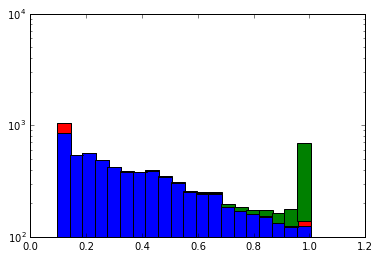

In [40]:
#hist_QCD1, bins_QCD1 = np.histogram(probsQCD1.T[1], bins=20)
#hist_QCD2, bins_QCD2 = np.histogram(probsQCD2.T[1], bins=20)
hist_QCD3, bins_QCD3 = np.histogram(probsQCD3.T[1], bins=20)
hist_QCD4, bins_QCD4 = np.histogram(probsQCD4.T[1], bins=20)
hist_QCD5, bins_QCD5 = np.histogram(probsQCD5.T[1], bins=20)
hist_QCD6, bins_QCD6 = np.histogram(probsQCD6.T[1], bins=20)
hist_QCD7, bins_QCD7 = np.histogram(probsQCD7.T[1], bins=20)
hist_QCD8, bins_QCD8 = np.histogram(probsQCD8.T[1], bins=20)
hist_QCD9, bins_QCD9 = np.histogram(probsQCD9.T[1], bins=20)

hist_TT, bins_TT = np.histogram(probsTT.T[1], bins=20)

hist_TT = hist_TT * weight_ttbar

hist_Sig, bins_Sig = np.histogram(probsSig.T[1], bins=20)

hist_Sig = hist_Sig * weight_sig1400

#hist_QCD1 = hist_QCD1 * weight_qcd1
#hist_QCD2 = hist_QCD2 * weight_qcd2
hist_QCD3 = hist_QCD3 * weight_qcd3
hist_QCD4 = hist_QCD4 * weight_qcd4
hist_QCD5 = hist_QCD5 * weight_qcd5
hist_QCD6 = hist_QCD6 * weight_qcd6
hist_QCD7 = hist_QCD7 * weight_qcd7
hist_QCD8 = hist_QCD8 * weight_qcd8
hist_QCD9 = hist_QCD9 * weight_qcd9
hist_QCDsum = hist_QCD8 + hist_QCD9
bins = bins_QCD3

plt.close()
plt.bar(bins[:-1], hist_TT, width=0.05)
plt.bar(bins[:-1], hist_QCDsum, width=0.05, color='r', bottom=hist_TT)
plt.bar(bins[:-1], hist_Sig*10, width=0.05, color='g', bottom = hist_QCDsum+hist_TT)


plt.yscale('log')
plt.show()


In [119]:
hist_QCD1*weight_qcd1

array([  2.31e+06,   1.93e+04,   1.05e+04,   4.34e+03,   3.77e+03,
         3.87e+03,   3.82e+03,   2.22e+03,   2.55e+03,   2.36e+03])

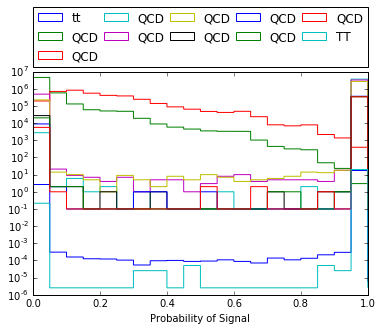

In [40]:
plt.close()
plt.figure()
plt.xlabel('Probability of Signal')
plt.hist(probsTT.T[1], bins=20, range=(0,1), label='tt', histtype='step',normed=True, log=True)
plt.hist(probsQCD1.T[1], bins=20, range=(0,1), label='QCD', histtype='step',normed=False, log=True)
plt.hist(probsQCD2.T[1], bins=20, range=(0,1), label='QCD', histtype='step',normed=False, log=True)
plt.hist(probsQCD3.T[1], bins=20, range=(0,1), label='QCD', histtype='step',normed=False, log=True)
plt.hist(probsQCD4.T[1], bins=20, range=(0,1), label='QCD', histtype='step',normed=False, log=True)
plt.hist(probsQCD5.T[1], bins=20, range=(0,1), label='QCD', histtype='step',normed=False, log=True)
plt.hist(probsQCD6.T[1], bins=20, range=(0,1), label='QCD', histtype='step',normed=False, log=True)
plt.hist(probsQCD7.T[1], bins=20, range=(0,1), label='QCD', histtype='step',normed=False, log=True)
plt.hist(probsQCD8.T[1], bins=20, range=(0,1), label='QCD', histtype='step',normed=False, log=True)
plt.hist(probsQCD9.T[1], bins=20, range=(0,1), label='QCD', histtype='step',normed=False, log=True)
plt.hist(probsSig.T[1], bins=20, range=(0,1), label='TT', histtype='step',normed=True, log=True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", borderaxespad=0.)
plt.show()

In [79]:
hist1 = np.array([1,2,3,4])
hist2 = np.array([10, 10, 10, 10])

In [83]:
hist1*1.123+ hist2

array([ 11.12,  12.25,  13.37,  14.49])